## Rounded Micro Domain

The micro domain is defined by a bounding box and a smooth function parameterising the floor of the micro domain. 

In [2]:
import sys
sys.path.append('/home/emastr/phd/')

import torch
from boundary_solvers.gauss_grid_2d import *
from boundary_solvers.geometry import *
import numpy as np
import matplotlib.pyplot as plt
from util.plot_tools import *
from boundary_solvers.blobs import *

(-0.8800000131130219,
 0.8800000131130219,
 -0.5925138601371207,
 1.0758339933398628)

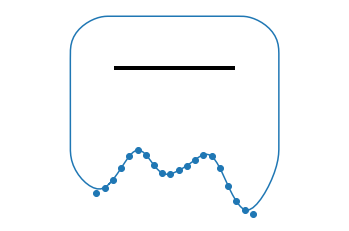

In [4]:
np.random.seed(0)
mg = GPDomain("exp", 
              shape=.05, 
              num=20, 
              scale=.05, 
              bound=.3, 
              width=1, 
              height=1, 
              corner_w = 0.3,
              line_pos=0.6, 
              n_refine=2, 
              n_corner_refine=0)   
    
mg.plot(ax=plt.gca())
remove_axes(plt.gca())
plt.axis("equal")    

Converged in 0 iterations
Converged in 0 iterations


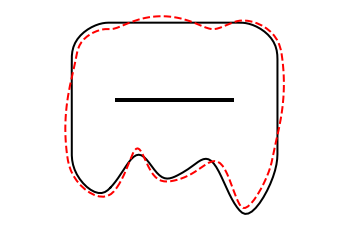

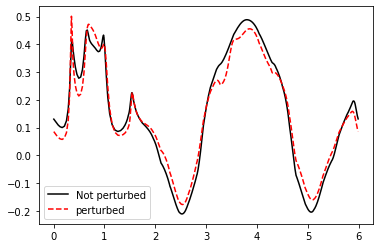

In [27]:
np.random.seed(0)
mg = GPDomain("exp", 
              shape=.05, 
              num=20, 
              scale=.05, 
              bound=.3, 
              width=1, 
              height=1, 
              corner_w = 0.3,
              line_pos=0.4, 
              n_refine=2, 
              n_corner_refine=0)    

rp, func = mg.precompute_line_avg(derivative=0, tol=1e-10, maxiter=40, verbose=True)
s = mg.curve_length()
p, dp, ddp = mg.param


### PERTURB A LITTLE
eps = 0.05
freq = 5 * 1j

q = lambda t: p(t) + eps * np.exp(freq * t)
dq = lambda t: dp(t) + freq * eps * np.exp(freq * t)
ddq = lambda t: ddp(t) + freq ** 2 * eps * np.exp(freq * t)
qparam = [q, dq, ddq]
mgQ = Geometry(qparam, mg.grid)

a = -0.45*mg.width + mg.line_pos * 1j
b = 0.45*mg.width + mg.line_pos*1j
rq, _ = mgQ.precompute_line_avg(a, b, derivative=0, tol=1e-10, maxiter=40, verbose=True)

mg.plot(ax=plt.gca(), show_samples=False, color="black", linewidth=2)  
mgQ.plot(ax=plt.gca(), color="red", linestyle="--", linewidth=2)
plt.axis("equal")
remove_axes(plt.gca())

plt.figure(2)
plt.plot(s, np.real(rp), 'black', label='Not perturbed')
plt.plot(s, np.real(rq), 'red', linestyle='--', label='perturbed')
plt.legend()

Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations
Converged in 0 iterations


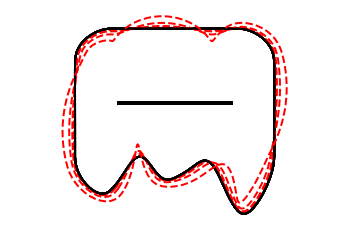

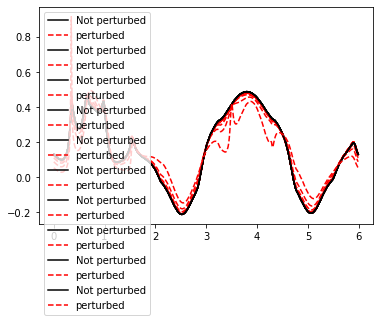

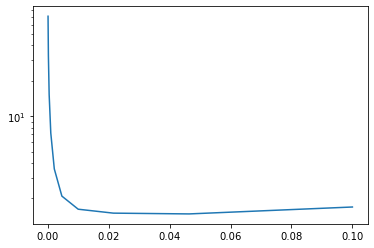

In [46]:
np.random.seed(0)
mg = GPDomain("exp", 
              shape=.05, 
              num=20, 
              scale=.05, 
              bound=.3, 
              width=1, 
              height=1, 
              corner_w = 0.3,
              line_pos=0.4, 
              n_refine=3, 
              n_corner_refine=0)    

rp, func = mg.precompute_line_avg(derivative=0, tol=1e-10, maxiter=40, verbose=True)
s = mg.curve_length()
p, dp, ddp = mg.param


### PERTURB A LITTLE
eps_list = np.logspace(-4,-1,10)
err_list = []
freq = 5 * 1j
for eps in eps_list:

    q = lambda t: p(t) + eps * np.exp(freq * t)
    dq = lambda t: dp(t) + freq * eps * np.exp(freq * t)
    ddq = lambda t: ddp(t) + freq ** 2 * eps * np.exp(freq * t)
    qparam = [q, dq, ddq]
    mgQ = Geometry(qparam, mg.grid)

    a = -0.45*mg.width + mg.line_pos * 1j
    b = 0.45*mg.width + mg.line_pos*1j
    rq, _ = mgQ.precompute_line_avg(a, b, derivative=0, tol=1e-10, maxiter=40, verbose=True)
    
    plt.figure(1)
    mg.plot(ax=plt.gca(), show_samples=False, color="black", linewidth=2)  
    mgQ.plot(ax=plt.gca(), color="red", linestyle="--", linewidth=2)
    plt.axis("equal")
    remove_axes(plt.gca())

    plt.figure(2)
    plt.plot(s, np.real(rp), 'black', label='Not perturbed')
    plt.plot(s, np.real(rq), 'red', linestyle='--', label='perturbed')
    plt.legend()
    
    err_list.append(np.linalg.norm(rp - rq)/len(rp)**0.5/eps)
    
plt.figure()
plt.semilogy(eps_list, err_list)